In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

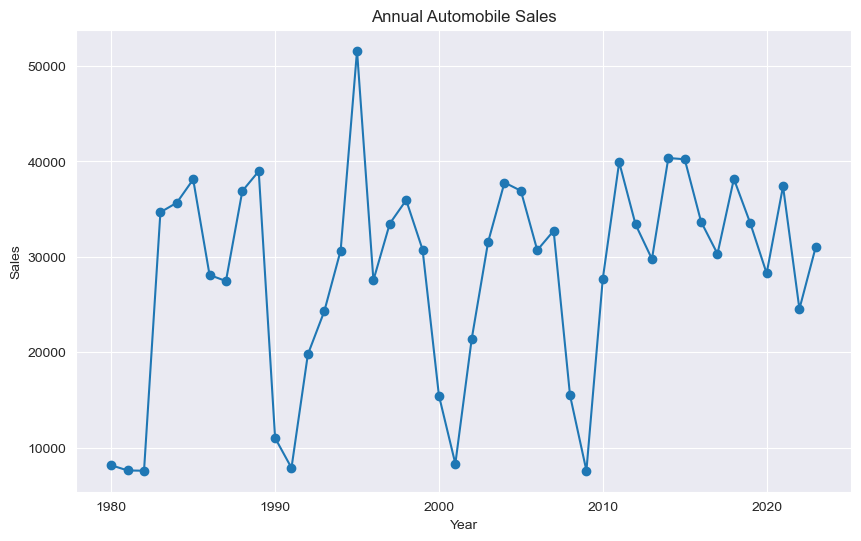

In [6]:
# Task 1.1 - Line chart: Annual sales fluctuation
df.groupby("Year")["Automobile_Sales"].sum().plot(marker='o', figsize=(10,6), title="Annual Automobile Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

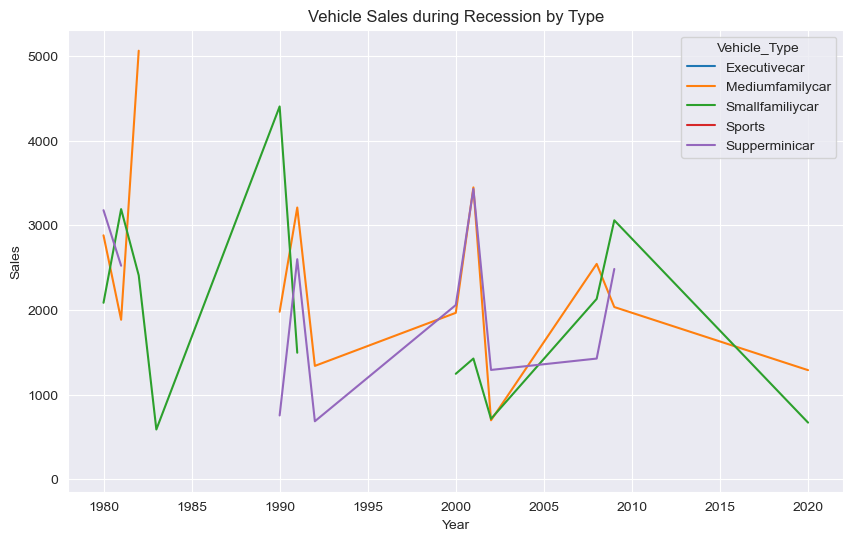

In [7]:
# Task 1.2 - Line chart by vehicle type during recession
df[df['Recession'] == 1].groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack().plot(figsize=(10,6))
plt.title("Vehicle Sales during Recession by Type")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

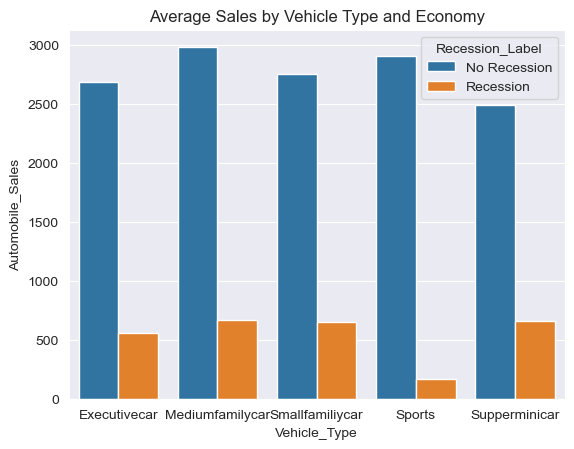

In [8]:
# Task 1.3 - Bar chart: Recession vs Non-recession comparisonLine_plot_2
avg_sales = df.groupby(['Vehicle_Type', 'Recession_Label'])['Automobile_Sales'].mean().reset_index()
sns.barplot(data=avg_sales, x='Vehicle_Type', y='Automobile_Sales', hue='Recession_Label')
plt.title("Average Sales by Vehicle Type and Economy")
plt.show()

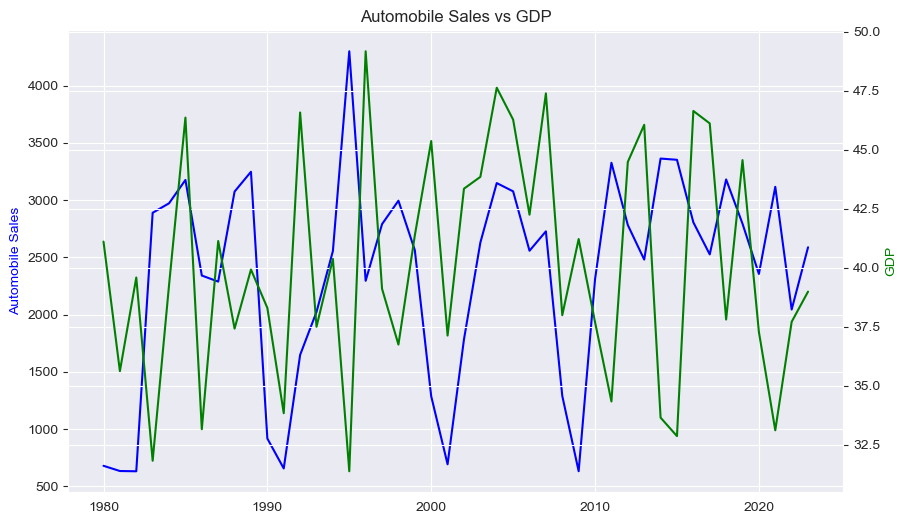

In [9]:
# Task 1.4 - Subplot comparing GDP
yearly = df.groupby('Year')[['Automobile_Sales', 'GDP']].mean().reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(yearly['Year'], yearly['Automobile_Sales'], color='blue')
ax1.set_ylabel('Automobile Sales', color='blue')
ax2 = ax1.twinx()
ax2.plot(yearly['Year'], yearly['GDP'], color='green')
ax2.set_ylabel('GDP', color='green')
plt.title("Automobile Sales vs GDP")
plt.show()

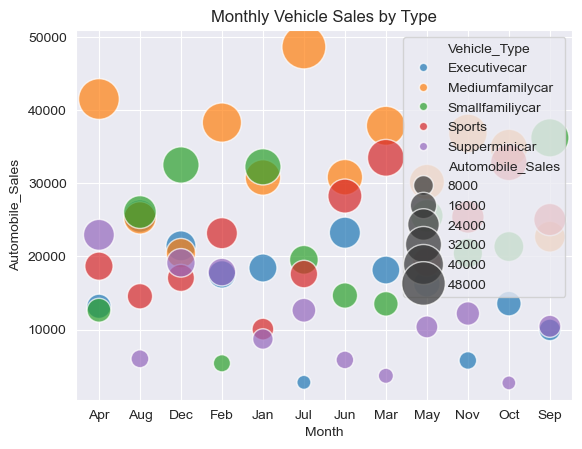

In [10]:
# Task 1.5 - Bubble chart: Seasonality
monthly = df.groupby(['Month', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
sns.scatterplot(data=monthly, x='Month', y='Automobile_Sales', size='Automobile_Sales', hue='Vehicle_Type', sizes=(100, 1000), alpha=0.7)
plt.title('Monthly Vehicle Sales by Type')
plt.show()

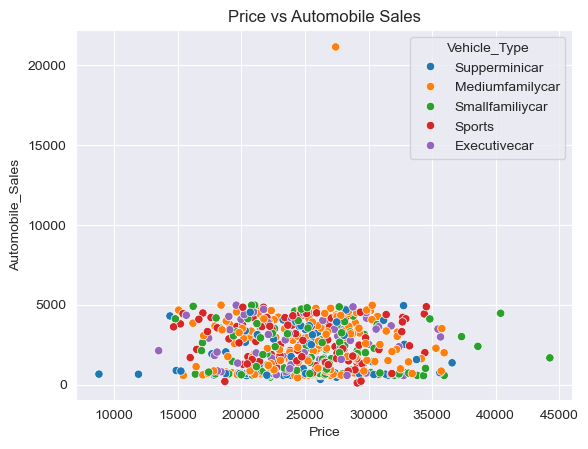

In [11]:
# Task 1.6 - Scatter plot: Price vs Volume
sns.scatterplot(data=df, x='Price', y='Automobile_Sales', hue='Vehicle_Type')
plt.title("Price vs Automobile Sales")
plt.show()

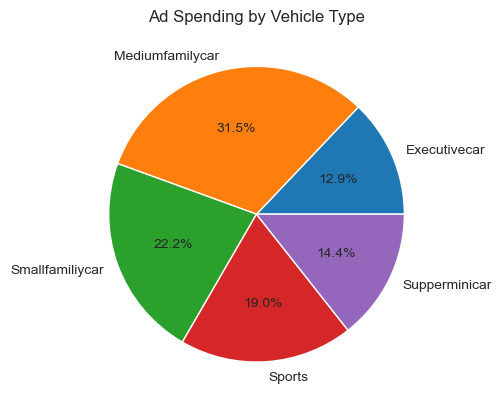

In [12]:
# Task 1.7 - Pie chart: Total advertising expenditure
ad_exp = df.groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
plt.pie(ad_exp, labels=ad_exp.index, autopct='%1.1f%%')
plt.title("Ad Spending by Vehicle Type")
plt.show()

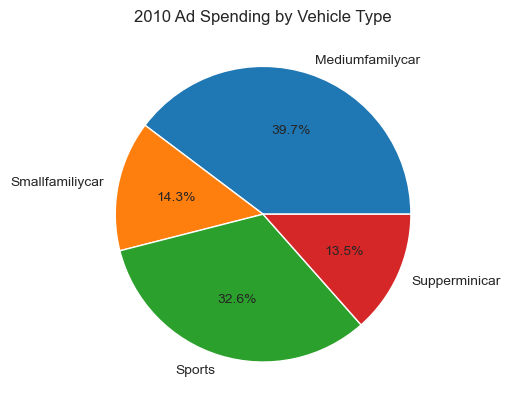

In [13]:
# Task 1.8 - Pie chart: Year-specific ad expenditure
ad_2010 = df[df['Year'] == 2010].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
plt.pie(ad_2010, labels=ad_2010.index, autopct='%1.1f%%')
plt.title("2010 Ad Spending by Vehicle Type")
plt.show()

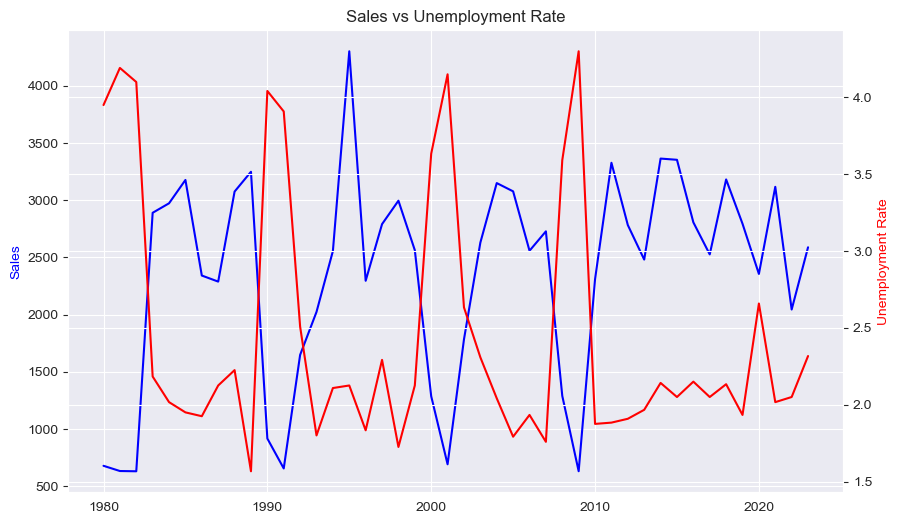

In [17]:
# Task 1.9 - Line chart: Unemployment vs Sales
unemp_sales = df.groupby("Year")[['Automobile_Sales', 'unemployment_rate']].mean().reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(unemp_sales['Year'], unemp_sales['Automobile_Sales'], color='blue')
ax1.set_ylabel('Sales', color='blue')
ax2 = ax1.twinx()
ax2.plot(unemp_sales['Year'], unemp_sales['unemployment_rate'], color='red')
ax2.set_ylabel('Unemployment Rate', color='red')
plt.title("Sales vs Unemployment Rate")
plt.show()